In [1]:
!pip install statsmodels
!pip install scikit-learn

In [2]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#load dataset
df=pd.read_csv('C:/classisificatn and regressin/us-airlines-monthly-aircraft-miles-flown.csv' ,header=0,parse_dates=[0])

In [4]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [5]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [7]:
df.index=df['Month']# Set the DataFrame index to the 'Month' column to use month values as row labels

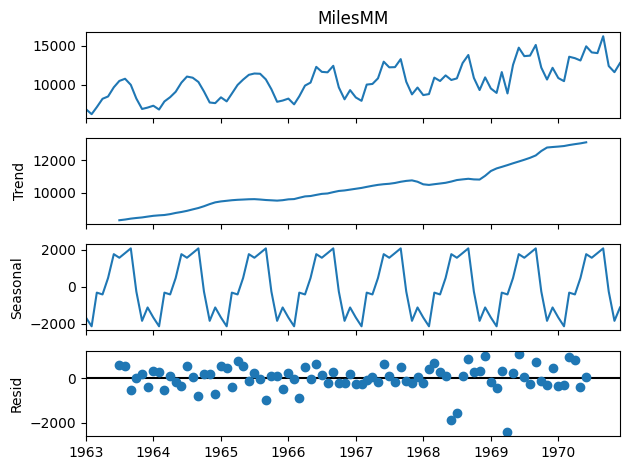

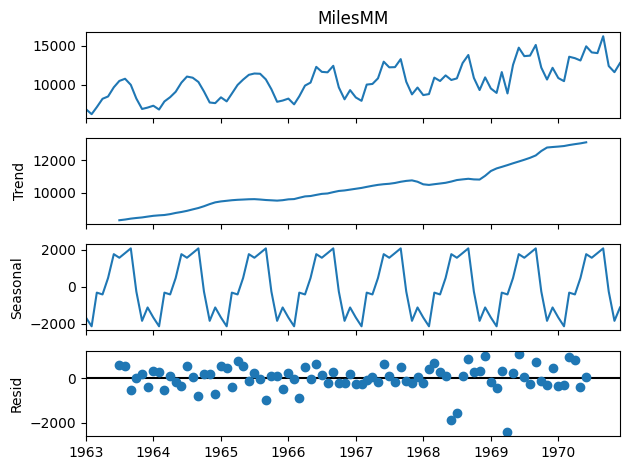

In [9]:
# The 'Multiplicative' model is used, assuming the components (trend, seasonality, residual) multiply together to form the series
result_a=seasonal_decompose(df['MilesMM'],model='Multiplicative')
result_a.plot()

In [16]:
model=SARIMAX(df['MilesMM'],order=(5,1,3),seasonal_order=(1,1,1,12))

C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
model_fit=model.fit()

C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
residuals=model_fit.resid

<Axes: xlabel='Month'>

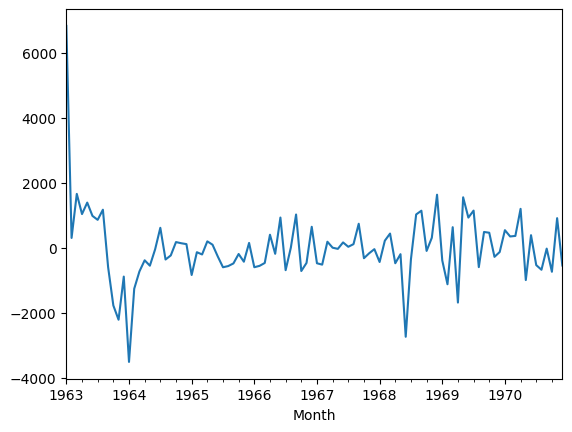

In [19]:
residuals.plot()

In [20]:
output=model_fit.forecast()

In [21]:
output

1971-01-01    11476.290875
Freq: MS, dtype: float64

In [24]:
model_fit.forecast(12)

1971-01-01    11476.290875
1971-02-01    11153.873055
1971-03-01    13670.739628
1971-04-01    12648.626295
1971-05-01    14338.880632
1971-06-01    15786.652179
1971-07-01    14979.822121
1971-08-01    15362.832671
1971-09-01    16963.456833
1971-10-01    13681.978948
1971-11-01    12426.998254
1971-12-01    13730.862493
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
yhat=model_fit.predict()

In [26]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.976549
1963-03-01    5422.325073
1963-04-01    7121.634330
1963-05-01    7068.646021
Freq: MS, Name: predicted_mean, dtype: float64

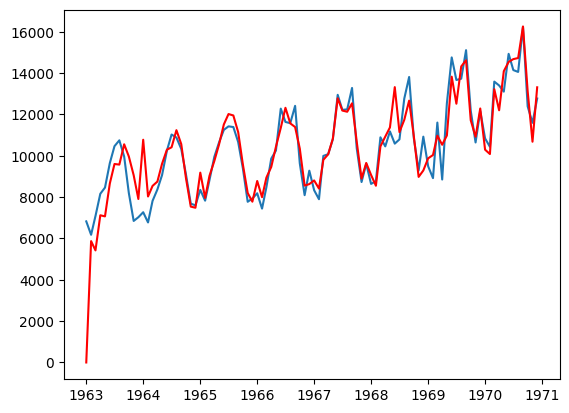

In [27]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat,color='red')